>Submitted by: Aryan Pandey (S00330383)

>Submitted as: Lab 1 work for ITEC203



## **2021 July Berlin Airbnb Dataset Analysis**


In [2]:
import pandas as pd

# Importing data using github link ( i uploaded the data to my github repository for easy access)
url = "https://raw.githubusercontent.com/bobbhai69/ITEC203_Lab_repo/refs/heads/main/Lab2/Data/listings_berlin.csv"
df = pd.read_csv(url)

# Checking basic information about the data set
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19095 entries, 0 to 19094
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19095 non-null  int64  
 1   name                            19065 non-null  object 
 2   host_id                         19095 non-null  int64  
 3   host_name                       19083 non-null  object 
 4   neighbourhood_group             19095 non-null  object 
 5   neighbourhood                   19095 non-null  object 
 6   latitude                        19095 non-null  float64
 7   longitude                       19095 non-null  float64
 8   room_type                       19095 non-null  object 
 9   price                           19095 non-null  int64  
 10  minimum_nights                  19095 non-null  int64  
 11  number_of_reviews               19095 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0
5,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2019-12-11,2.44,1,0
6,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,200,6,8,2020-01-04,0.17,1,1
7,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,90,26,2013-02-01,0.26,3,238
8,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,60,48,2017-12-14,0.41,2,73
9,17904,Beautiful Kreuzberg studio/fast WiFi,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,49,5,287,2021-01-16,2.26,1,288


In [3]:
# Checking for null values
df.isnull().sum()

,0
id,0
name,30
host_id,0
host_name,12
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


> It can be observed that the total number of property listed is *19,095*.
> The dataset contains different information relating to the property like its location, prices, room types, reviews, availabilities and so on.
> The dataset is missing a lot of values in the *last_review* and *reviews_per_month*.
>

In [4]:
# Getting the number of unique values for each column
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in column '{column}': {unique_values}")

Number of unique values in column 'id': 19095
Number of unique values in column 'name': 18545
Number of unique values in column 'host_id': 15375
Number of unique values in column 'host_name': 5341
Number of unique values in column 'neighbourhood_group': 12
Number of unique values in column 'neighbourhood': 138
Number of unique values in column 'latitude': 9438
Number of unique values in column 'longitude': 12004
Number of unique values in column 'room_type': 4
Number of unique values in column 'price': 406
Number of unique values in column 'minimum_nights': 105
Number of unique values in column 'number_of_reviews': 364
Number of unique values in column 'last_review': 2213
Number of unique values in column 'reviews_per_month': 596
Number of unique values in column 'calculated_host_listings_count': 32
Number of unique values in column 'availability_365': 366


> We will try to fill the missing values using mean for the numeric columns. We do this by importing numpy module.

In [5]:
import numpy as np

for column in df.select_dtypes(include= np.number).columns:
  df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())

id                                   0
name                                30
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4155
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64


<ipython-input-5-bef677576ef3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


#### Dropping Categorical Columns
After we drop inconsistent categorical columns we are left with only data set which we can scale and normalize according to our need.


In [6]:
df_cleaned = df.drop(['name', 'host_name', 'last_review'], axis = 1)
df_cleaned.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,2164,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,0.21,3,101
1,2015,2217,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2.20,6,357
2,3176,3718,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,1.14,1,254
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,0.28,1,285
4,6883,16149,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,1.02,1,0


> Then we encode the remaining categorical dataset


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Initialize the LabelEncoder
label_encoder = {}
for column in df_cleaned.select_dtypes(include='object').columns:
  le = LabelEncoder()
  df_cleaned[column] = le.fit_transform(df_cleaned[column])
  label_encoder[column] = le

print(df_cleaned.head())


     id  host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
0  1944     2164                    4             17  52.54433   13.39761   
1  2015     2217                    4             18  52.53305   13.40394   
2  3176     3718                    6            100  52.53471   13.41810   
3  3309     4108                   10            112  52.49884   13.34940   
4  6883    16149                    1             33  52.51163   13.45289   

   room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
0          2     28              60                 18               0.21   
1          0     74              90                141               2.20   
2          0     90              62                147               1.14   
3          2     29               7                 27               0.28   
4          0     79               7                135               1.02   

   calculated_host_listings_count  availability_365  
0                   

#### Feature Scaling the Data
We use standard scalar (z-score scaling) and minmax scalar to normalize our data.
Then We will visualize the the scaled data using various techniques.

In [8]:
# Feature Scaling the Data

#Standardization (Z-score scaling)
scaler = StandardScaler()
df_standardized = df_cleaned.copy()
df_standardized[df_cleaned.select_dtypes(include=np.number).columns] = scaler.fit_transform(df_cleaned[df_cleaned.select_dtypes(include=np.number).columns])
df_standardized.head()



,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.683580,-0.867891,-0.075542,-1.471741,1.053253,-0.111900,1.099764,-0.332510,1.513124,-0.074731,-0.397601,-0.017477,0.076216
1,-1.683576,-0.867890,-0.075542,-1.447352,0.704998,-0.011345,-0.882209,0.005114,2.405051,2.452538,1.159091,0.368473,2.081825
2,-1.683498,-0.867876,0.587511,0.552615,0.756248,0.213592,-0.882209,0.122549,1.572586,2.575819,0.329898,-0.274776,1.274881
3,-1.683489,-0.867872,1.913616,0.845294,-0.351193,-0.877736,1.099764,-0.325171,-0.062612,0.110191,-0.342843,-0.274776,1.517747
4,-1.683249,-0.867760,-1.070121,-1.081504,0.043682,0.766245,-0.882209,0.041812,-0.062612,2.329256,0.236027,-0.274776,-0.715060


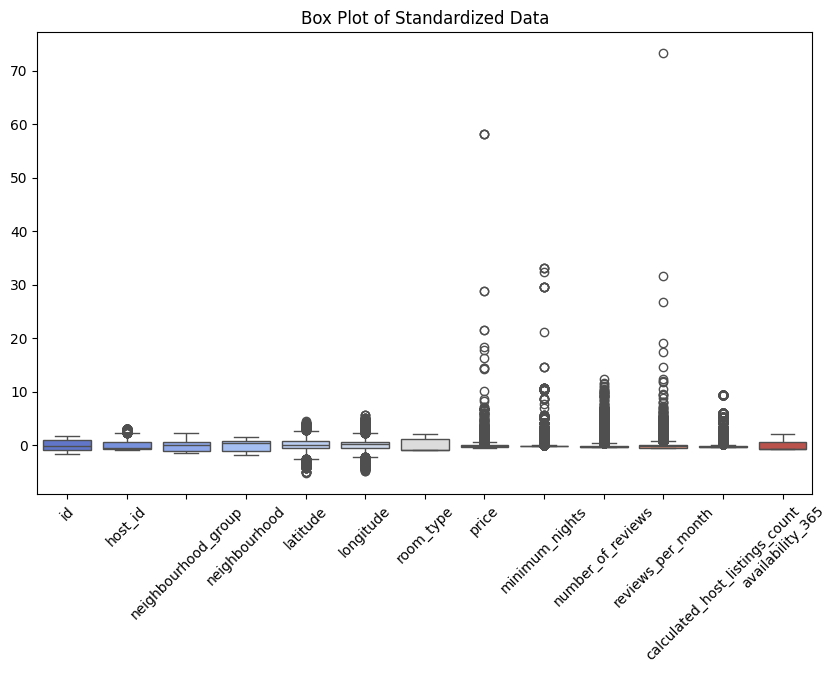

In [9]:
#Visualizing Standardized data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_standardized, palette='coolwarm')
plt.title('Box Plot of Standardized Data')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Normalization (min-max scaling)
scaler_minmax = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[df_cleaned.select_dtypes(include=np.number).columns] = scaler_minmax.fit_transform(df_cleaned[df_cleaned.select_dtypes(include=np.number).columns])
df_normalized.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.000000,0.000001,0.363636,0.124088,0.646311,0.455091,0.666667,0.003500,0.052538,0.029032,0.002120,0.026667,0.276712
1,0.000001,0.000002,0.363636,0.131387,0.610619,0.464678,0.000000,0.009250,0.079252,0.227419,0.023214,0.066667,0.978082
2,0.000024,0.000005,0.545455,0.729927,0.615871,0.486126,0.000000,0.011250,0.054319,0.237097,0.011978,0.000000,0.695890
3,0.000027,0.000006,0.909091,0.817518,0.502373,0.382070,0.666667,0.003625,0.005343,0.043548,0.002862,0.000000,0.780822
4,0.000097,0.000035,0.090909,0.240876,0.542843,0.538820,0.000000,0.009875,0.005343,0.217742,0.010706,0.000000,0.000000


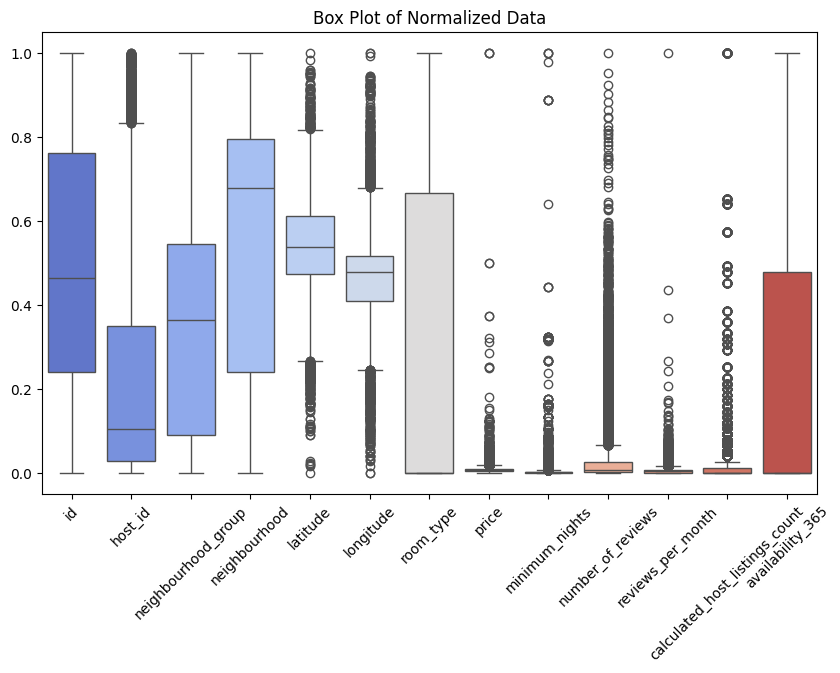

In [11]:
# Visualizing Normalized data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_normalized, palette='coolwarm')
plt.title('Box Plot of Normalized Data')
plt.xticks(rotation=45)
plt.show()

#### Further visualization on dataset
We use scatterplots, and other visualization techniques to discern on some narratives or trends.

In [12]:
# Folium Map to visualize the distribution of price ranges of airbnb by plotting longitude and lattitude and color grading pricewise
import folium
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# Define a color map for the normalized price values
color_map = cm.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=df_normalized['price'].min(), vmax=df_normalized['price'].max())

def get_color(price):
    return mcolors.to_hex(color_map(norm(price)))



# Initializing a map centered at an average location
map_center = folium.Map(location = [df['latitude'].mean(), df['longitude'].mean()], zoom_start = 6)

# Use MarkerCluster to efficiently plot large dataset
marker_cluster = MarkerCluster().add_to(map_center)

# Adding markers to the cluster
for idx, row in df_normalized.iterrows():

  # Getting the location from df
  location = df.loc[idx, ['latitude', 'longitude']].tolist()

  # Adding a circle marker to the map
  folium.CircleMarker(
        location = location,
        radius =7,
        color = get_color(row['price']),
        fill = True,
        fill_color = get_color(row['price']),
        popup = folium.Popup(f"Price: {row['price']}", parse_html = True)
    ).add_to(marker_cluster)

map_center

Output hidden; open in https://colab.research.google.com to view.

> From above map, we can visualize the distribution of Airbnb in Berlin.

#### Scatter plot
We create a scatter plot displaying all properties with latitude on x-axis and longitude on the y-axis.

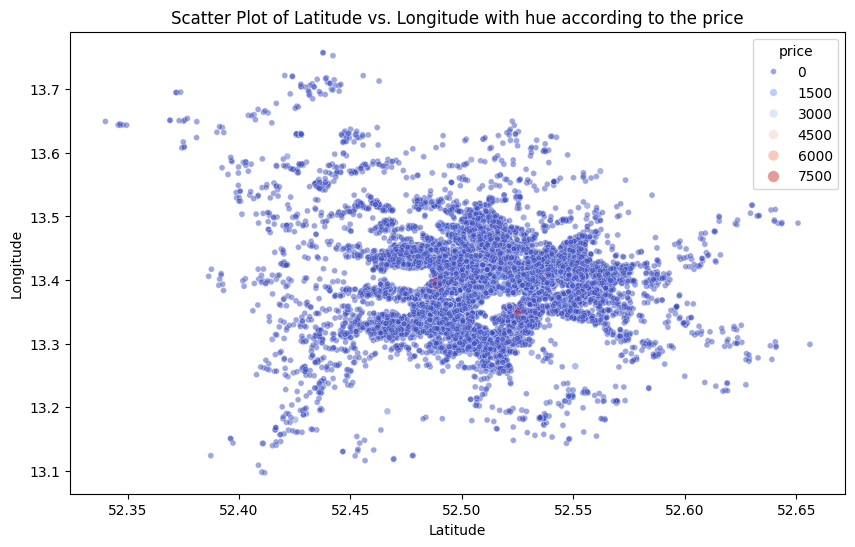

In [14]:
# Scatter plot with price

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = df['latitude'],
    y = df['longitude'],
    hue = df['price'],
    size = df['price'],
    palette = 'coolwarm',
    alpha = 0.5
)

# Label and titles
plt.title('Scatter Plot of Latitude vs. Longitude with hue according to the price')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

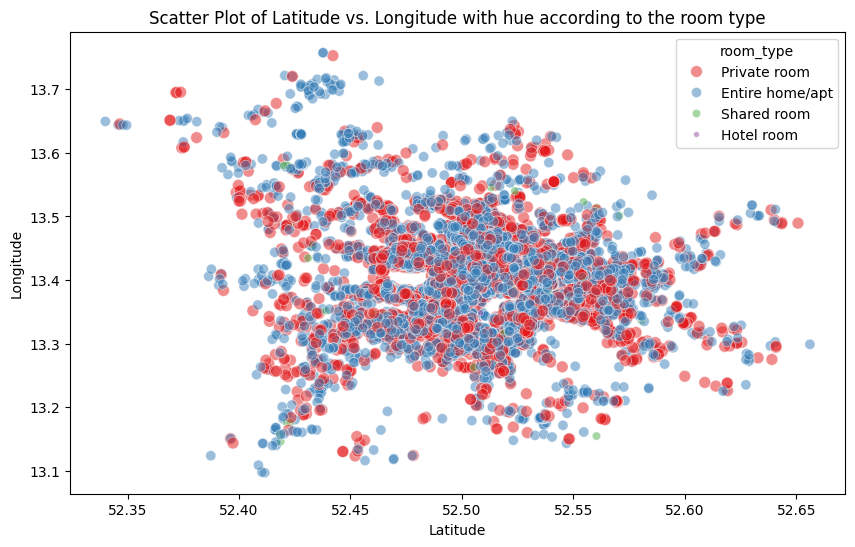

In [15]:
# Scatter plot with room type
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = df['latitude'],
    y = df['longitude'],
    hue = df['room_type'],
    size = df['room_type'],
    palette = 'Set1',
    alpha = 0.5
)

# Label and titles
plt.title('Scatter Plot of Latitude vs. Longitude with hue according to the room type')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

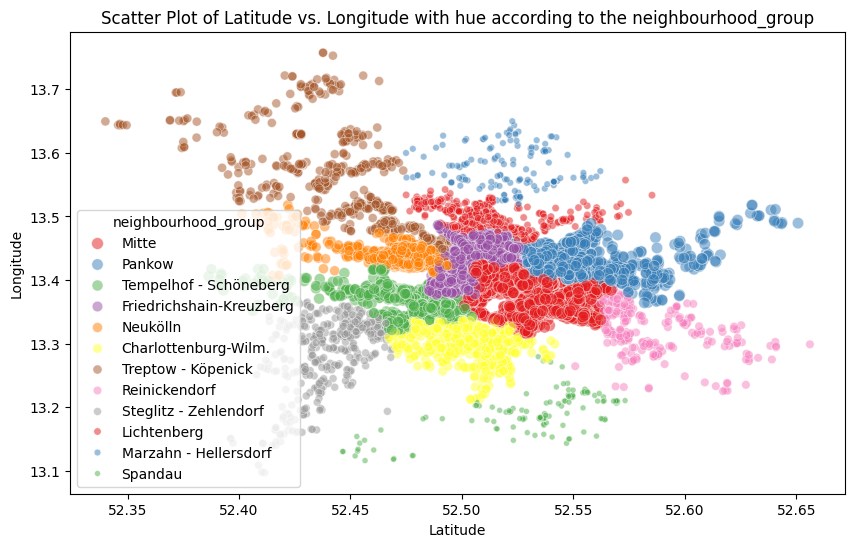

In [17]:
# Scatter plot with neighbourhood_group

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = df['latitude'],
    y = df['longitude'],
    hue = df['neighbourhood_group'],
    size = df['neighbourhood_group'],
    palette = 'Set1',
    alpha = 0.5
)

# Label and titles
plt.title('Scatter Plot of Latitude vs. Longitude with hue according to the neighbourhood_group')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### Histograms


<ipython-input-19-e3d074a86045>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['room_type'], palette='Set1')


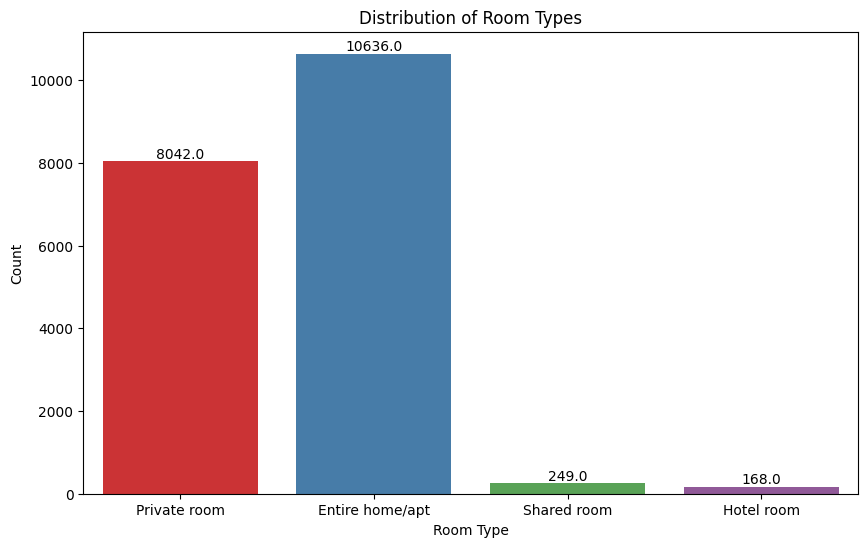

In [19]:
# Generating Histograms to analyze the distribution of room types among the properties

# Histogram to visualize number of properties for each room type
plt.figure(figsize=(10, 6))

sns.countplot(x=df['room_type'], palette='Set1')

# We add value labels on top of each bar using Matplotlib's annotate() function.
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Label and titles
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

> Couple stages ago we plotted a scatterplot of roomtypes with longitude lattitude to visualize how room types are distributed within Berlin. We saw that the property types are dominated by Entire home/apt as the first place and private rooms as second while the number of shared room and hotel room seems to be less than less than 250.

### Further Analysis

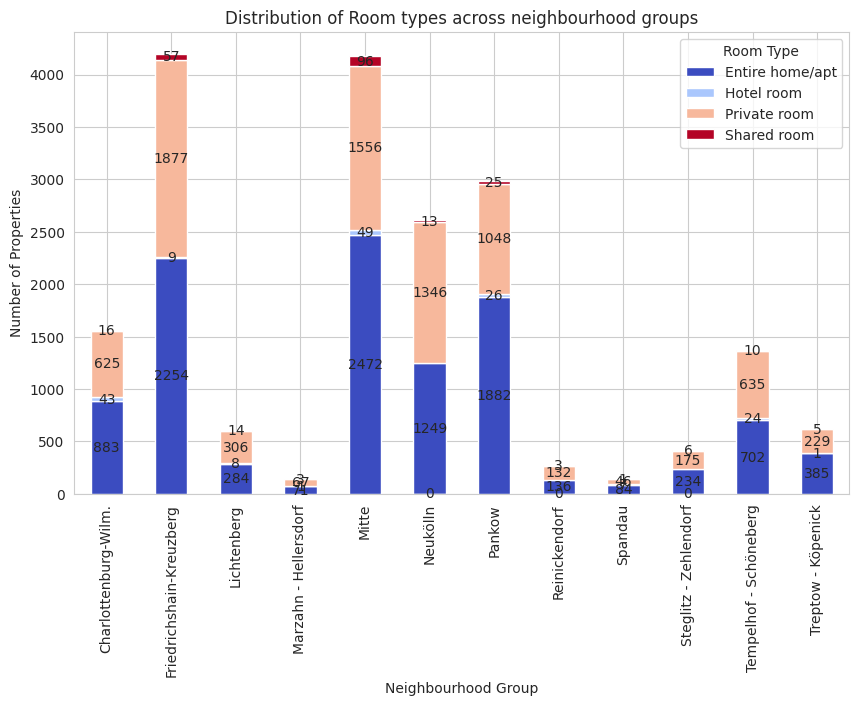

In [29]:
# Count number of properties per (neighbourhood_group, room_type)
grouped_counts = df.groupby(["neighbourhood_group", "room_type"]).size().unstack()

# Set pot style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the grouped counts
grouped_counts.plot(kind="bar", colormap ="coolwarm", stacked=True, figsize=(10,6), ax=ax)

# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt = '%d',label_type='center')

# Labels and title
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Properties")
plt.title("Distribution of Room types across neighbourhood groups")
# plt.xticks(rotation=-45)
plt.legend(title="Room Type")

# Show the plot
plt.show()

> We can clearly see how well the pattern is between entire home/apt and private room is throughout the graph.

#### Correlation
 For further analysis we can also find the correlation between the availability of the rooms with the price.

In [32]:
# Calculating correlation between 'availability_365' and 'price'
correlation = df['availability_365'].corr(df['price'])
print(f"Correlation between 'availability_365' and 'price': {correlation}")

correlation_standardized = df_standardized['availability_365'].corr(df_standardized['price'])
print(f"Correlation between 'availability_365' and 'price': {correlation_standardized}")

correlation_normalized = df_normalized['availability_365'].corr(df_normalized['price'])
print(f"Correlation between 'availability_365' and 'price': {correlation_normalized}")



Correlation between 'availability_365' and 'price': 0.1348657641533708
Correlation between 'availability_365' and 'price': 0.13486576415337068
Correlation between 'availability_365' and 'price': 0.13486576415337054


> I did with standardized data, normalized data and original data, to check consistencies in case I had some mistakes during the process.

It seems that the correlation is very week between availability 365 and price.

In [35]:
# Printing correlational matrix for normalized data
print("Correlation Matrix for Normalized Data:")
print(df_normalized.corr())


Correlation Matrix for Normalized Data:
                                      id   host_id  neighbourhood_group  \
id                              1.000000  0.554547             0.021192   
host_id                         0.554547  1.000000             0.033559   
neighbourhood_group             0.021192  0.033559             1.000000   
neighbourhood                  -0.071192 -0.070106             0.084465   
latitude                        0.016537  0.022922            -0.168690   
longitude                      -0.008364 -0.034970             0.020908   
room_type                      -0.034799 -0.002083            -0.018124   
price                           0.052599  0.049102            -0.009172   
minimum_nights                 -0.021278 -0.019798            -0.002062   
number_of_reviews              -0.295230 -0.136464            -0.017968   
reviews_per_month               0.062738  0.091499            -0.003102   
calculated_host_listings_count  0.178455  0.171130          

 > We can go into deeper analysis by checking how the price outliers are affecting the mean, and so on.

Mean Price: 73.3032207384132
Median Price: 52.0


<ipython-input-38-f53a3f3a040f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['price'], palette='coolwarm')


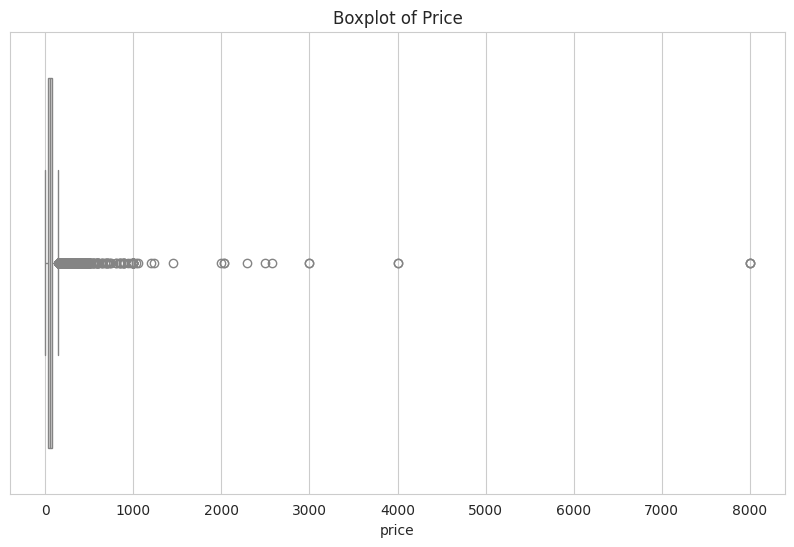

In [38]:
# Calculate the mean and median of the price column
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")

# Plotting a boxplot to visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], palette='coolwarm')
plt.title('Boxplot of Price')
plt.show()